In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



# CSV File - Read
df = pd.read_csv('C:\\Users\\HP\\Downloads\\CreditRiskTrainData.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

print(df.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
df.isnull().sum()
# find missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
#df2 = df.dropna()
#print(sales2)
#print(df2.shape)

In [4]:
from collections import Counter
Counter(df['Gender'])

Counter({'Male': 489, 'Female': 112, nan: 13})

In [5]:
# Fill Empty data to Male
gender_null = df[df['Gender'].isnull()].index.tolist()
df['Gender'].iloc[gender_null] = "Male"
Counter(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'Male': 502, 'Female': 112})

In [6]:
Counter(df['Married'])

Counter({'No': 213, 'Yes': 398, nan: 3})

In [7]:
gender_null = df[df['Married'].isnull()].index.tolist()
df['Married'].iloc[gender_null] = "Yes"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
Counter(df['Dependents'])


Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [9]:
gender_null = df[df['Dependents'].isnull()].index.tolist()
df['Dependents'].iloc[gender_null] = "0"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
# FIll Others as per step 4,step5

In [11]:
Counter(df['Self_Employed'])

Counter({'No': 500, 'Yes': 82, nan: 32})

In [12]:
gender_null = df[df['Self_Employed'].isnull()].index.tolist()
df['Self_Employed'].iloc[gender_null] = "No"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [14]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,42,3,13,493,15
True,0,0,0,0,0,2,1,0,19,0


In [15]:
df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:

(df['Loan_Amount_Term']).value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
(df['Credit_History']).value_counts()
df['Credit_History'][ ( df['Credit_History'].isnull())] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
dfNew = pd.get_dummies(df.drop(['Loan_ID'],axis=1) ,drop_first=True)
dfNew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,130.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [21]:
from sklearn.model_selection import cross_val_score
dfInput = dfNew.iloc[:,0:14] 
print(dfInput.head())
dfoutput = dfNew.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(dfNew))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0

In [24]:
dfNew2 = dfNew.query('ApplicantIncome < 16000')
print(dfNew2.shape)
X = dfNew2.iloc[:,[0,2]]
print(X.head())
Y = dfNew2.iloc[:,-1] 
print(Y.head())



(590, 15)
   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


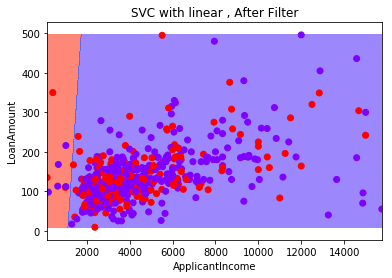

In [25]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

#print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow_r, alpha=0.6)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()

In [29]:
from sklearn.svm import SVC
model =SVC()
model.fit(X,Y)
pred = model.predict(X)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y,pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       185
          1       1.00      1.00      1.00       405

avg / total       1.00      1.00      1.00       590



model score:: 0.9966101694915255


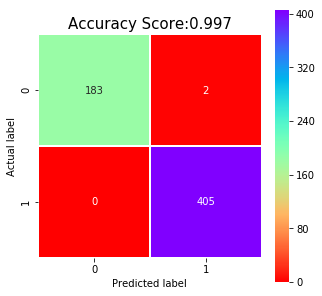

In [30]:
#print(confusion_matrix(Y_test,pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(Y , pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

ms = model.score(X,Y)
print("model score::",ms)
all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);